<a href="https://colab.research.google.com/github/ProfessorAbraham/solar-challenge-week1/blob/eda-sierra-leone/sierra_leone_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Replace with your actual GitHub repo
!git clone https://github.com/professorAbraham/solar-challenge-week1.git
%cd solar-challenge-week1


Cloning into 'solar-challenge-week1'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 29 (delta 5), reused 25 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 4.85 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/solar-challenge-week1


In [21]:
!git checkout -b eda-sierra-leone


Switched to a new branch 'eda-sierra-leone'


In [34]:
!git commit -m "feat: EDA on eda-sierra-leone dataset - summary and cleaning"

[eda-sierra-leone a15f736] feat: EDA on eda-sierra-leone dataset - summary and cleaning
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 notebooks/eda-sierra-leone.ipynb


In [35]:
!git push -u origin eda-sierra-leone

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 371 bytes | 371.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: This repository moved. Please use the new location:
remote:   https://github.com/ProfessorAbraham/solar-challenge-week1.git
To https://github.com/professorAbraham/solar-challenge-week1.git
   f8923b3..a15f736  eda-sierra-leone -> eda-sierra-leone
Branch 'eda-sierra-leone' set up to track remote branch 'eda-sierra-leone' from 'origin'.


In [33]:
!git add notebooks/eda-sierra-leone.ipynb

In [23]:
import pandas as pd
df = pd.read_csv("/content/solar-challenge-week1/data/sierraleone-bumbuna.csv")

In [24]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [25]:
df.describe()
df.isna().sum() / len(df) * 100

,0
Timestamp,0.0
GHI,0.0
DNI,0.0
DHI,0.0
ModA,0.0
ModB,0.0
Tamb,0.0
RH,0.0
WS,0.0
WSgust,0.0


In [26]:
from scipy.stats import zscore

z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[z_cols].apply(zscore)
outliers = (df_z.abs() > 3).sum()
outliers

,0
GHI,2477
DNI,7586
DHI,2986
ModA,1604
ModB,2041
WS,3967
WSgust,3665


In [27]:
df_cleaned = df.copy()
for col in z_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

In [28]:
df_cleaned.to_csv("sierra_leone.csv", index=False)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


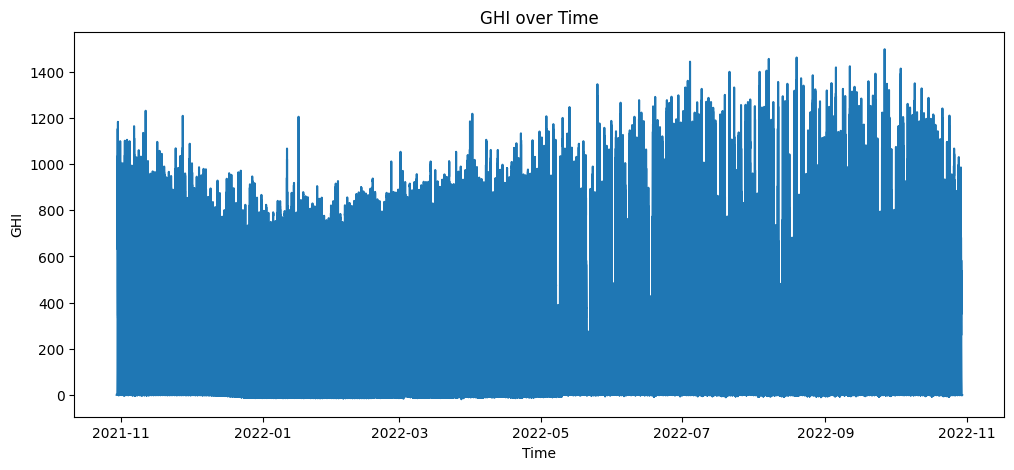

In [30]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # if not already datetime
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.show()

## Sierra Leone is finished here ❤